In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np 
dataset = pd.read_csv("data.csv")
dataset.head()
#使用pandas DataFrame的head()方法查看前5行。

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [2]:
#通过info（）方法可以快速获取数据集的简单描述。如总行数，每个属性的类型和非空值的数量。
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

# 数据处理和可视化

陈曼婷

通过对数据的简单分析我们可以发现无用列id和全空列Unnamed: 32 属于无用数据，需要进行删除。该数据集的特征值没有空缺，无需进行填充。下面我们将进行数据清洗操作。

In [3]:
#进行数据清洗
#M(恶性)= 0，B(良性)= 1
dataset['diagnosis'] = dataset['diagnosis'].replace(['M','B'],['0','1'])
#删除无用列id和全空列Unnamed: 32  
dataset=dataset.drop(['Unnamed: 32', 'id'], axis = 1)#第一次没删除的时候需要。删除之后重新运行会报错
dataset.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


绘制类别特征的频数条形图(0恶性 1良性 本数据集良性样本较多)

<AxesSubplot:xlabel='diagnosis', ylabel='count'>

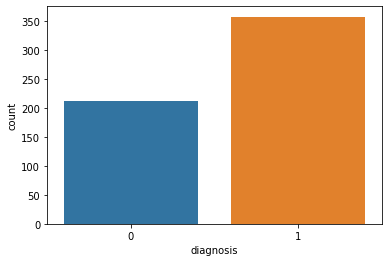

In [4]:
sns.countplot(x=dataset['diagnosis'])#0恶性 1良性 本数据集良性样本较多
#sns.countplot() 用于类别特征的频数条形图，可以画类别特征和y值（y值特征也是类比的话）的条形图

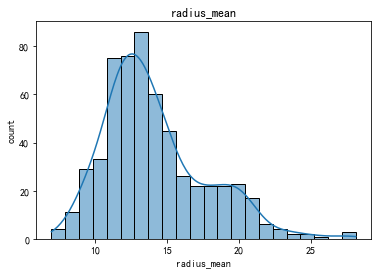

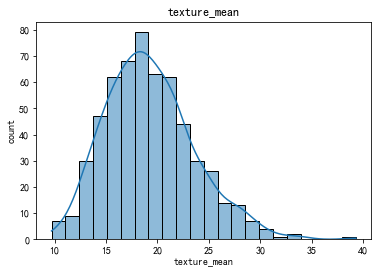

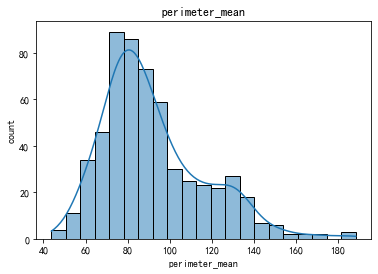

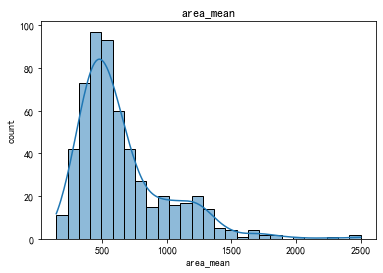

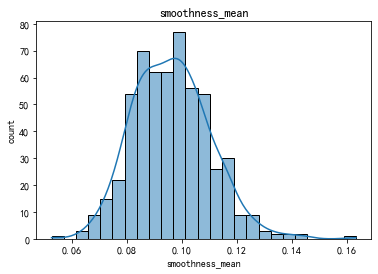

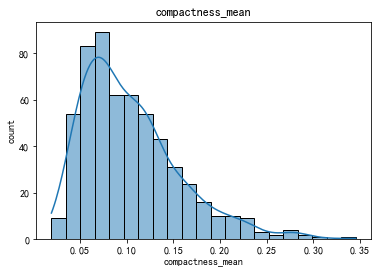

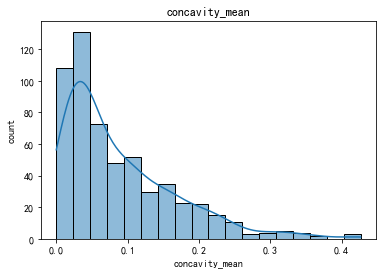

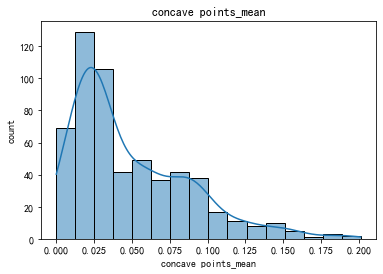

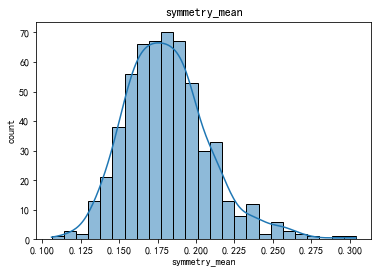

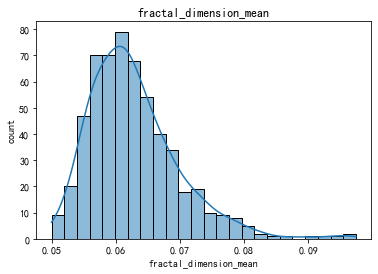

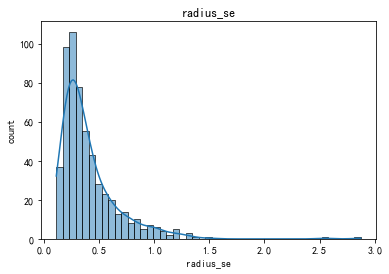

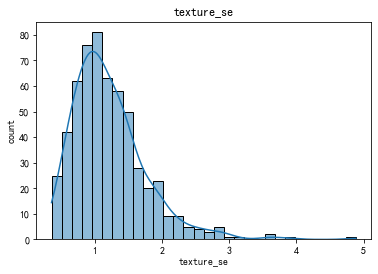

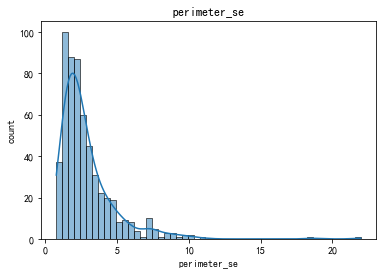

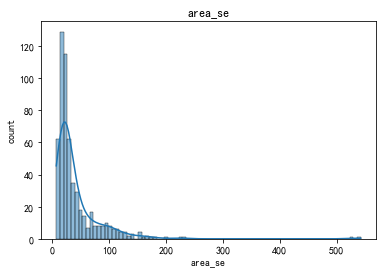

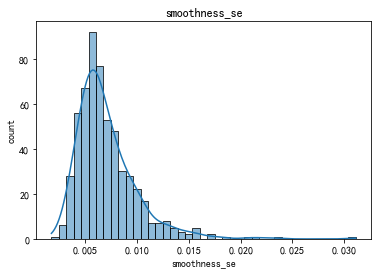

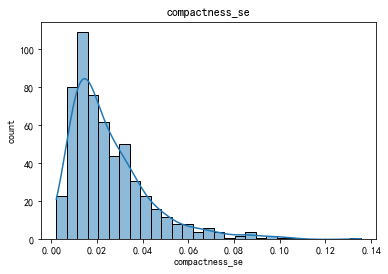

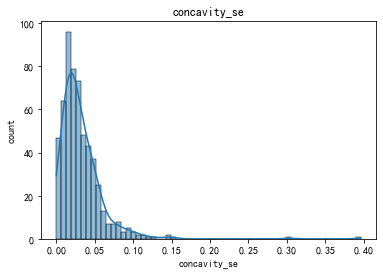

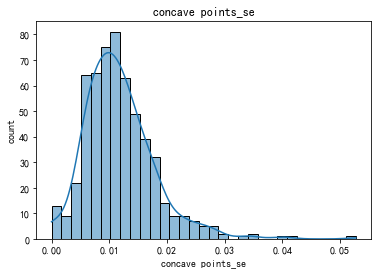

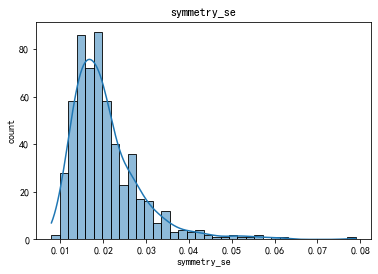

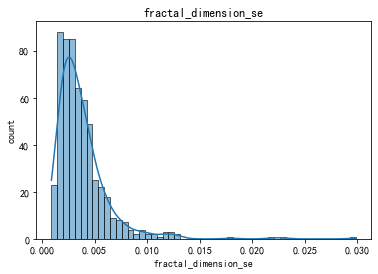

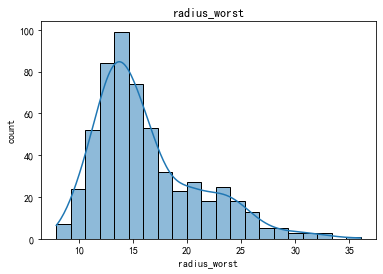

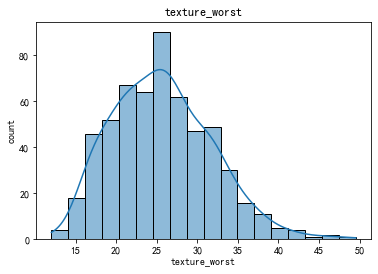

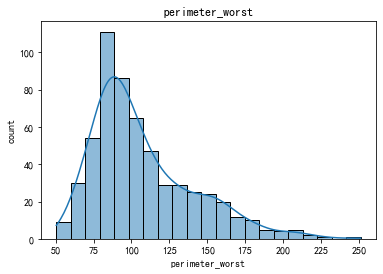

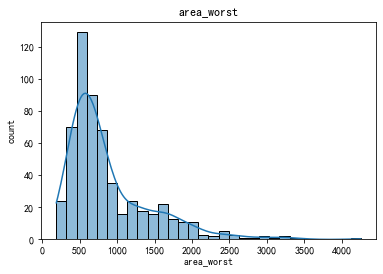

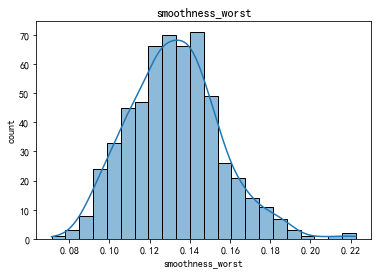

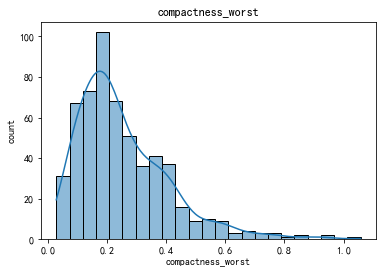

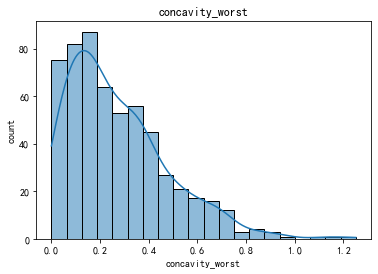

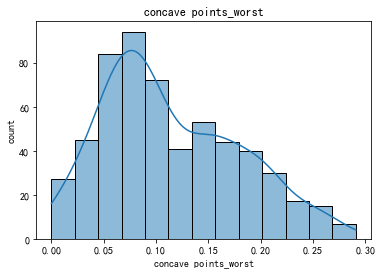

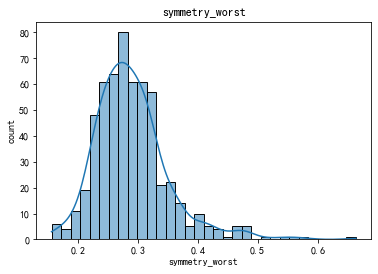

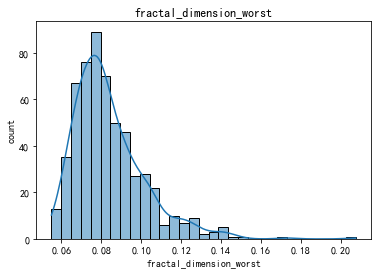

In [5]:
#绘制每个数值属性的直方图
dataset2=dataset.drop('diagnosis', axis = 1)#特征遍历需要去除标签这一列
plt.rcParams['font.family'] = 'SimHei' 
for i, feature_name in enumerate(dataset2.columns.values):
    plt.figure(figsize=(6, 4))
    sns.histplot(dataset2.iloc[:, i], kde=True)
    plt.xlabel(feature_name)
    plt.ylabel("count")
    plt.title(feature_name)
    plt.show()

.describe()方法可以得到数据集的统计信息，包括计数、均值、标准差、最小值、25%分位数、中位数、75%分位数和最大值

In [6]:
print(dataset.shape)
dataset.describe()#显示属性摘要

(569, 31)


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


热力图中的颜色表示相关性的强度。颜色深，说明两者相关性强，可以剔除两者中的一个变量，从而避免过拟合。从可视化结果我们可以看出该数据集有不少特征具有较强相关性,接下来可以通过特征选择提高模型的拟合效果。

C:\Users\CMT\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\CMT\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


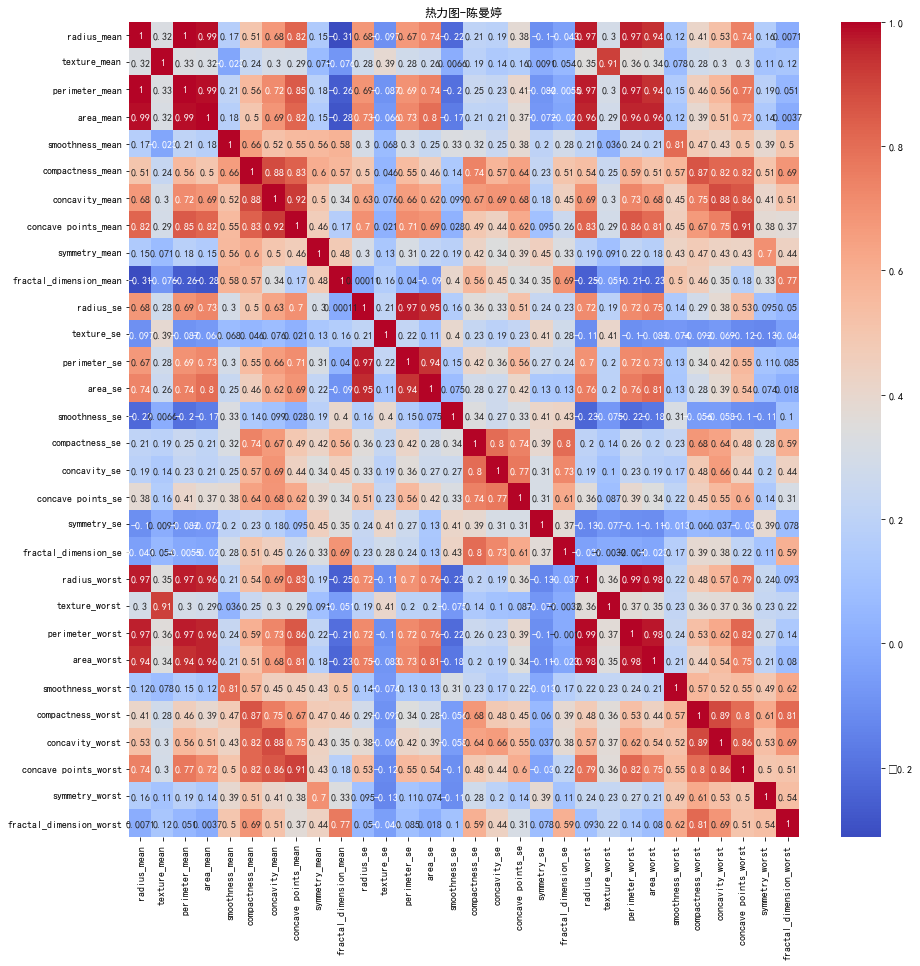

In [7]:
# 可视化相关系数热力图
plt.figure(figsize=(15, 15))
sns.heatmap(dataset.corr(), annot=True, cmap="coolwarm")
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.title("热力图-陈曼婷")
plt.show()
#热力图中的颜色表示相关性的强度
#颜色深，说明两者相关性强，可以剔除两者中的一个变量，从而避免过拟合

# KNN

kNN是一个基本而简单的分类算法，作为监督学习，那么KNN模型需要的是有标签的训练数据，对于新样本的类别由与新样本距离最近的k个训练样本点按照分类决策规则决定。

In [8]:
#第一个模型：KNN
#接下来是sklearn库自带的特征选择效果
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
x= dataset.drop('diagnosis', axis = 1)#去除标签，其余的就是特征
y=dataset['diagnosis']#该列为标签

In [9]:
model =KNeighborsClassifier()
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
# 计算模型准确率
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.956140350877193


未经过特征选择的KNN模型准确率大致为0.9561，下面我们来看看经过特征选择后的模型准确率效果会不会更好。

In [10]:
#特征选择
maxi=10
maxa=0.9
#特征缩放
scaler= StandardScaler()
x=scaler.fit_transform(dataset.drop('diagnosis', axis = 1))#去除标签，其余的就是特征
for i in range(10,30):
    selector = SelectKBest(score_func=f_classif, k=i)
    selected_features = selector.fit_transform(x, y)
    X_train, X_test, y_train, y_test = train_test_split(selected_features, y, test_size=0.2, random_state=42)
    model.fit(X_train, y_train)
    # 在测试集上进行预测
    y_pred = model.predict(X_test)
    # 计算模型准确率
    accuracy = accuracy_score(y_test, y_pred)
    print("特征选择{}个后模型准确率:{}".format(i,accuracy))
    if(accuracy>maxa):
        maxa=accuracy
        maxi=i
print(maxi,maxa)   

特征选择10个后模型准确率:0.9736842105263158
特征选择11个后模型准确率:0.9649122807017544
特征选择12个后模型准确率:0.9649122807017544
特征选择13个后模型准确率:0.9649122807017544
特征选择14个后模型准确率:0.9649122807017544
特征选择15个后模型准确率:0.9649122807017544
特征选择16个后模型准确率:0.9649122807017544
特征选择17个后模型准确率:0.9736842105263158
特征选择18个后模型准确率:0.9649122807017544
特征选择19个后模型准确率:0.9649122807017544
特征选择20个后模型准确率:0.9649122807017544
特征选择21个后模型准确率:0.9649122807017544
特征选择22个后模型准确率:0.9649122807017544
特征选择23个后模型准确率:0.9649122807017544
特征选择24个后模型准确率:0.9649122807017544
特征选择25个后模型准确率:0.9649122807017544
特征选择26个后模型准确率:0.9649122807017544
特征选择27个后模型准确率:0.9649122807017544
特征选择28个后模型准确率:0.9649122807017544
特征选择29个后模型准确率:0.9649122807017544
10 0.9736842105263158


In [11]:
selector = SelectKBest(score_func=f_classif, k=10)
selected_features = selector.fit_transform(x, y)
X_train, X_test, y_train, y_test = train_test_split(selected_features, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)
# 在测试集上进行预测
y_pred = model.predict(X_test)
# 计算模型准确率
# 计算模型准确率
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
selected_feature_indices = selector.get_support()
selected_feature_names = dataset.drop('diagnosis', axis = 1).columns[selected_feature_indices]
print("选择的特征为:")
print(selected_feature_names)

0.9736842105263158
选择的特征为:
Index(['radius_mean', 'perimeter_mean', 'area_mean', 'concavity_mean',
       'concave points_mean', 'radius_worst', 'perimeter_worst', 'area_worst',
       'concavity_worst', 'concave points_worst'],
      dtype='object')


经过遍历后我们选出了效果最好的特征选择数量，此时模型准确率大致为0.9737，较之前有所上升。
下面我们将绘制该模型的ROC曲线和混淆矩阵对模型效果进行可视化。
TP：正确肯定——实际是正例，识别为正例
FN：错误否定（漏报）——实际是正例，却识别成了负例
FP：错误肯定（误报）——实际是负例，却识别成了正例
TN：正确否定——实际是负例，识别为负例
FPR = FP/(FP+TN)
TPR = TP/(TP+FN)


我们希望实际是恶性的不要被识别为良性，即负例不要被识别为正例，即FPR=0
我们希望实际是良性的不要被识别为恶性，即正例不要被识别为负例，即TPR=1
理想目标：TPR=1，FPR=0,即图中(0,1)点，故ROC曲线越靠拢(0,1)点，越偏离45度对角线越好。

In [12]:
from sklearn import metrics, model_selection, preprocessing
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import numpy as np
f1_score = metrics.f1_score(y_test, model.predict(X_test),pos_label='1')#,pos_label='1'
print('f1_score:{}'.format(f1_score))
predict_probs = model.predict_proba(X_test)
y_score = predict_probs[:,1]
fpr,tpr,thresholds = metrics.roc_curve(y_test, y_score, pos_label='1')
roc_auc = metrics.auc(fpr,tpr)  # 计算auc的值

f1_score:0.9787234042553192


F1得分可以解释为精确率和召回率的调和平均值，有更好的评估效果。F1得分较高，说明在检测方面具有较好的效果。

In [13]:
#查看精确率、召回率、F1-score
from sklearn.metrics import classification_report
print(classification_report(y_test,model.predict(X_test),target_names=["恶性","良性"]))

              precision    recall  f1-score   support

          恶性       0.95      0.98      0.97        43
          良性       0.99      0.97      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



<Figure size 432x288 with 0 Axes>

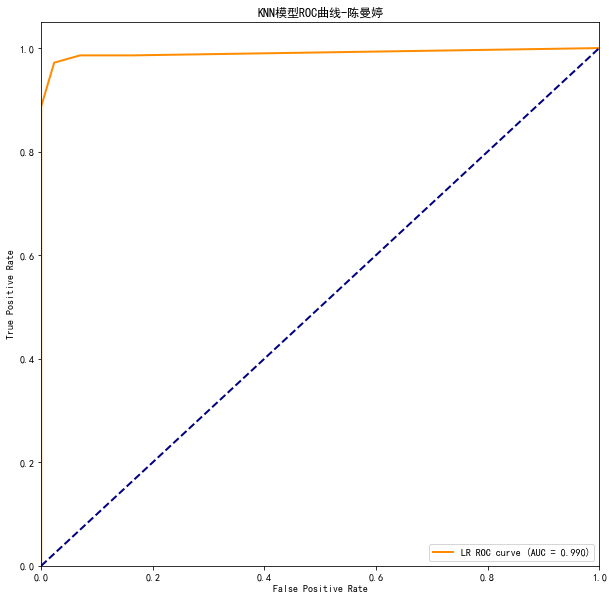

In [14]:
# 绘制roc曲线
plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange',lw=lw,label='LR ROC curve (AUC = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.rcParams['font.family']='SimHei'#加上这个可以显示中文
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN模型ROC曲线-陈曼婷')
plt.legend(loc="lower right")
plt.show()
#理想目标：TPR=1，FPR=0,即图中(0,1)点，故ROC曲线越靠拢(0,1)点，越偏离45度对角线越好，Sensitivity、Specificity越大效果越好。

混淆矩阵是分析误分类的一个重要指标。对角线表示已正确分类的类。

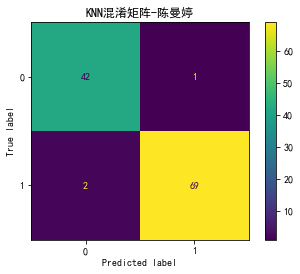

In [15]:
#该分类应用于该数据集的的测试集时的混淆矩阵    
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
plot_confusion_matrix(model, X_test, y_test)  
plt.title("KNN混淆矩阵-陈曼婷")
plt.show()    

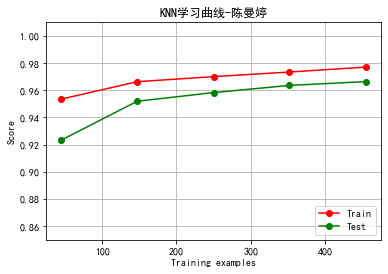

In [16]:
#导入样本数据
import numpy as np
#导入伯努利贝叶斯
from sklearn.naive_bayes import BernoulliNB
#导入数据集生成工具和拆分工具
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
#导入学习曲线库
from sklearn.model_selection import learning_curve
#导入随机拆分工具
from sklearn.model_selection import ShuffleSplit
#定义一个学习曲线函数
def plot_learning_curve(est, title, X, y, ylim=None, cv=None, n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    #设置横纵标签
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        est, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    plt.grid()
    plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label = "Train")
    plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label = "Test")
    plt.legend(loc="lower right")
    #plt.legend(["Train", "Test"])
    return plt

title = "KNN学习曲线-陈曼婷"
#设定拆分数量
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
plot_learning_curve(model, title, x, y, ylim=(0.85, 1.01), cv=cv, n_jobs=4)
plt.show()

# 逻辑回归 

In [17]:
#第二个模型：逻辑回归
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")
x=dataset.drop('diagnosis', axis = 1)#去除标签，其余的就是特征
y=dataset['diagnosis']#该列为标签
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
# 创建逻辑回归模型并设置迭代次数
model2 = LogisticRegression(max_iter=1000)
model2.fit(X_train, y_train)
y_pred = model2.predict(X_test)
# 计算模型准确率
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.956140350877193


初始逻辑回归模型的准确率大致为0.9561，经过特征缩放和特征选择后应该会继续上升，让我们开始实践：注意这里的训练集和测试集应该在
处理后的数据集上进行划分。

In [18]:
#特征缩放
scaler= StandardScaler()
x=scaler.fit_transform(dataset.drop('diagnosis', axis = 1))#去除标签，其余的就是特征
#特征选择
maxi=10
maxa=0.9
for i in range(5,25):
    selector = SelectKBest(score_func=f_classif, k=i)
    selected_features2 = selector.fit_transform(x, y)
    X_train, X_test, y_train, y_test = train_test_split(selected_features2, y, test_size=0.2, random_state=42)
    model2.fit(X_train, y_train)
    # 在测试集上进行预测
    y_pred = model2.predict(X_test)
    # 计算模型准确率
    accuracy = accuracy_score(y_test, y_pred)
    print("特征选择{}个后模型准确率:{}".format(i,accuracy))
    if(accuracy>maxa):
        maxa=accuracy
        maxi=i
print(maxi,maxa)   

特征选择5个后模型准确率:0.9736842105263158
特征选择6个后模型准确率:0.9736842105263158
特征选择7个后模型准确率:0.9736842105263158
特征选择8个后模型准确率:0.9736842105263158
特征选择9个后模型准确率:0.9736842105263158
特征选择10个后模型准确率:0.9736842105263158
特征选择11个后模型准确率:0.956140350877193
特征选择12个后模型准确率:0.956140350877193
特征选择13个后模型准确率:0.9649122807017544
特征选择14个后模型准确率:0.9649122807017544
特征选择15个后模型准确率:0.9649122807017544
特征选择16个后模型准确率:0.9736842105263158
特征选择17个后模型准确率:0.9736842105263158
特征选择18个后模型准确率:0.9824561403508771
特征选择19个后模型准确率:0.9824561403508771
特征选择20个后模型准确率:0.9824561403508771
特征选择21个后模型准确率:0.9824561403508771
特征选择22个后模型准确率:0.9824561403508771
特征选择23个后模型准确率:0.9824561403508771
特征选择24个后模型准确率:0.9736842105263158
18 0.9824561403508771


In [19]:
selector = SelectKBest(score_func=f_classif, k=maxi)
selected_features2 = selector.fit_transform(x, y)
X_train, X_test, y_train, y_test = train_test_split(selected_features2, y, test_size=0.2, random_state=42)
model2.fit(X_train, y_train)
# 在测试集上进行预测
y_pred = model2.predict(X_test)
# 计算模型准确率
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
selected_feature_indices = selector.get_support()
selected_feature_names = dataset.drop('diagnosis', axis = 1).columns[selected_feature_indices]
print("选择的特征为:")
print(selected_feature_names)

0.9824561403508771
选择的特征为:
Index(['radius_mean', 'perimeter_mean', 'area_mean', 'compactness_mean',
       'concavity_mean', 'concave points_mean', 'radius_se', 'perimeter_se',
       'area_se', 'radius_worst', 'texture_worst', 'perimeter_worst',
       'area_worst', 'smoothness_worst', 'compactness_worst',
       'concavity_worst', 'concave points_worst', 'symmetry_worst'],
      dtype='object')


经过遍历后我们选出了效果最好的特征选择数量，此时模型准确率大致为0.9825，较之前有所上升。

In [20]:
f1_score2 = metrics.f1_score(y_test, model2.predict(X_test),pos_label='1')#,pos_label='1'
print('f1_score:{}'.format(f1_score2))
predict_probs = model2.predict_proba(X_test)
y_score2 = predict_probs[:,1]
fpr2,tpr2,thresholds2 = metrics.roc_curve(y_test, y_score2, pos_label='1')
roc_auc2 = metrics.auc(fpr2,tpr2)  # 计算auc的值

f1_score:0.9861111111111112


In [21]:
print(classification_report(y_test,model2.predict(X_test),target_names=["恶性","良性"]))

              precision    recall  f1-score   support

          恶性       1.00      0.95      0.98        43
          良性       0.97      1.00      0.99        71

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



<Figure size 432x288 with 0 Axes>

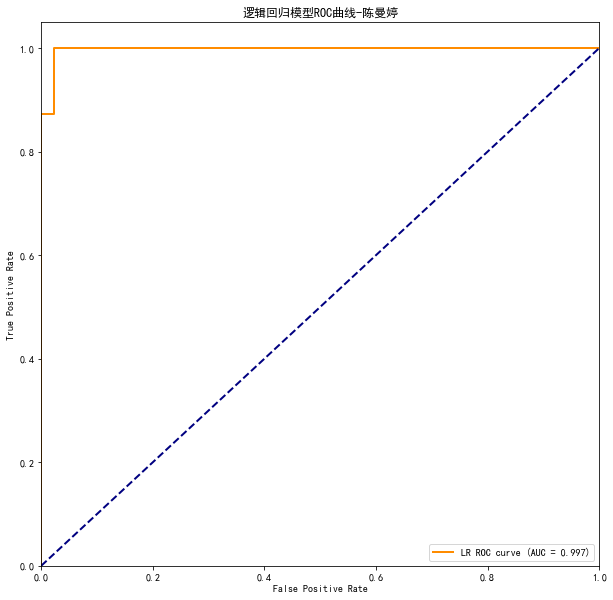

In [22]:
# 绘制roc曲线
plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr2, tpr2, color='darkorange',lw=lw,label='LR ROC curve (AUC = %0.3f)' % roc_auc2)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.rcParams['font.family']='SimHei'#加上这个可以显示中文
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('逻辑回归模型ROC曲线-陈曼婷')
plt.legend(loc="lower right")
plt.show()
#理想目标：TPR=1，FPR=0,即图中(0,1)点，故ROC曲线越靠拢(0,1)点，越偏离45度对角线越好，Sensitivity、Specificity越大效果越好。

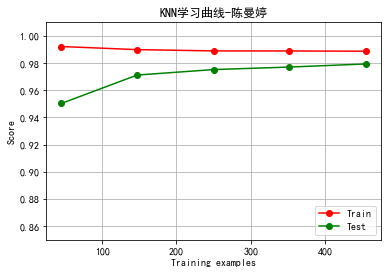

In [23]:
plot_learning_curve(model2, title,x, y, ylim=(0.85, 1.01), cv=cv, n_jobs=4)
title = "LR学习曲线-陈曼婷"
plt.show()

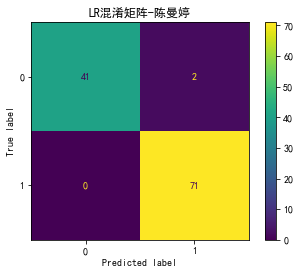

In [24]:
plot_confusion_matrix(model2, X_test, y_test) 
plt.title("LR混淆矩阵-陈曼婷")
plt.show()  

两种模型的ROC曲线对比：
AUC被定义为ROC曲线下的面积，取值范围一般在0.5和1之间。使用AUC值作为评价标准是因为很多时候ROC曲线并不能清晰的说明哪个分类器的效果更好，而作为一个数值，对应AUC更大的分类器效果更好。AUC值越大，模型的分类效果越好，疾病检测越准确。

<Figure size 432x288 with 0 Axes>

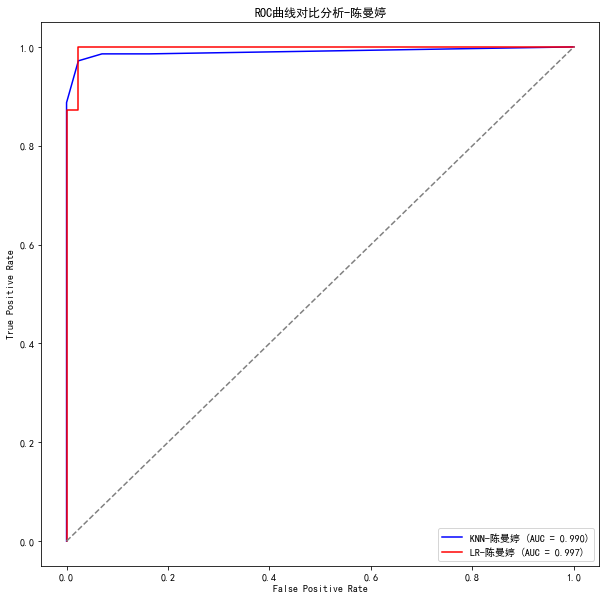

In [25]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
# 绘制ROC曲线
plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='b', label='KNN-陈曼婷 (AUC = %0.3f)' % roc_auc)
plt.plot(fpr2, tpr2, color='r', label='LR-陈曼婷 (AUC = %0.3f)' % roc_auc2)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC曲线对比分析-陈曼婷')
plt.legend(loc="lower right")
plt.show()

从对比图上我们可以分析得到，逻辑回归模型的效果和KNN相比较好。LR模型更接近(0,1)点，同时AUC的值也更大。

# 支持向量机

李佳蔚

支持向量机预测精准度: a1=  0.9210526315789473


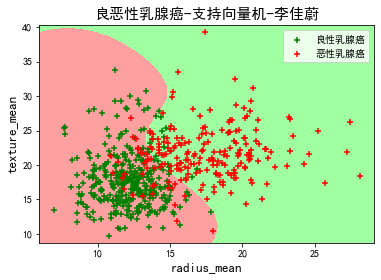

In [26]:
import pandas as pd  #pandas数据处理模块
from sklearn.model_selection import train_test_split  
from sklearn.metrics import accuracy_score  
from sklearn.svm import SVC  #支持向量机做分类 
import matplotlib.pyplot as plt 
import matplotlib as mpl
import numpy as np #numpy创建数组
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
 
# 读取本地数据集  
data = pd.read_csv('data.csv')  
datas = np.array(data)
x = np.array(data[['radius_mean','texture_mean']]) #radius_mean【半径平均值】 texture_mean【文理（灰度值的标准差）平均值】
data['diagnosis'] = data['diagnosis'].map({'M': 0, 'B': 1})  #M（恶性）、B（良性）
y = np.array(data['diagnosis'])
#拆分训练集与测试集
X_train,X_test,y_train,y_test = train_test_split(x, y,test_size = 0.2, random_state = 42)
svm = SVC().fit(X_train,y_train)

#绘制分类边界线  
l,r = x[:,0].min() -1, x[:,0].max() + 1  
b,t = x[:,1].min() -1, x[:,1].max() + 1  
n = 500 #分界线的光滑程度 
#从坐标向量中返回坐标矩阵  
grid_x,grid_y = np.meshgrid(np.linspace(1,r,n), np.linspace(b, t,n)) 
#把 grid_x 与 grid_t 押平了组成模型的输入，预测输出  
# ravel()方法将数组维度拉成一维数组  
mesh_x = np.column_stack((grid_x.ravel(),grid_y.ravel())) 
#模型预测准确率  
y_pred1 = svm.predict(X_test)   
a1 = accuracy_score(y_pred1, y_test)
print("支持向量机预测精准度: a1= ", a1)  
pred_mesh_y = svm.predict(mesh_x)  
grid_z = pred_mesh_y.reshape(grid_x.shape) 
 
#可视化
cm_light = mpl.colors.ListedColormap(['#A0FFA0', '#FFA0A0', ])
plt.pcolormesh(grid_x, grid_y,grid_z,label = 'dff',cmap = cm_light)  #plt.pcolormesh的作用在于能够直观表现出分类边界。
plt.scatter(x[y == 1,0], x[y == 1,1], s = 30, c ='g',marker='+',label = '良性乳腺癌')  #绘制散点图 s(散点大小） c(散点颜色)
plt.scatter(x[y == 0,0], x[y == 0,1], s = 30, c = 'r',marker='+',label = '恶性乳腺癌')
plt.title('良恶性乳腺癌-支持向量机-李佳蔚',fontsize = 15)
plt.xlabel('radius_mean', fontsize = 13)
plt.ylabel('texture_mean', fontsize = 13)
plt.xlim(l, r)  #显示X轴的作图范围
plt.ylim(b, t)  #显示Y轴的作图范围
plt.legend()    #在plt.plot()定义后plt.legend()会显示该label的内容
plt.show()      #显示图像

In [27]:
#打印拆分结果
print("1.数据集拆分情况：")
print("==============")
print("训练集：{}".format(X_train.shape))
print("测试集：{}".format(X_test.shape))
print("==============")

print("2.直接拟合的结果：")
print("==============")
print("训练集得分：{:.4f}".format(svm.score(X_train, y_train)))
print("测试集得分：{:.4f}".format(svm.score(X_test, y_test)))
print("==============")


1.数据集拆分情况：
训练集：(455, 2)
测试集：(114, 2)
2.直接拟合的结果：
训练集得分：0.9077
测试集得分：0.9211


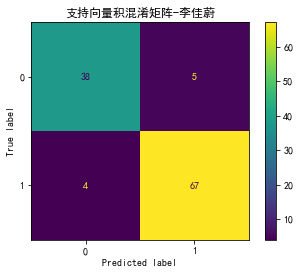

In [28]:
plot_confusion_matrix(svm, X_test, y_test) 
plt.title("支持向量积混淆矩阵-李佳蔚")
plt.show()  

In [29]:
y_pred=svm.fit(X_train, y_train).decision_function(X_test)
fpr507,tpr507,threshold = roc_curve(y_test, y_pred) ###计算真正率和假正率
roc_auc_507 = auc(fpr507,tpr507) ###计算auc的值，auc就是曲线包围的面积，越大越好

In [30]:
print(classification_report(y_test,svm.predict(X_test),target_names=["恶性","良性"]))

              precision    recall  f1-score   support

          恶性       0.90      0.88      0.89        43
          良性       0.93      0.94      0.94        71

    accuracy                           0.92       114
   macro avg       0.92      0.91      0.92       114
weighted avg       0.92      0.92      0.92       114



<Figure size 432x288 with 0 Axes>

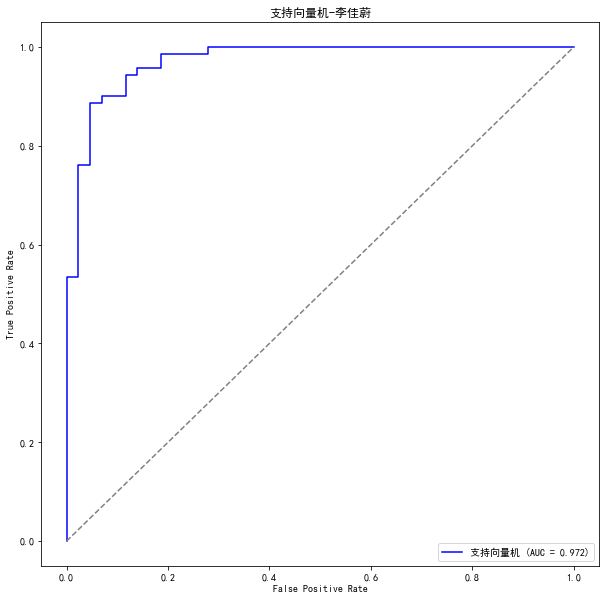

In [31]:
plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr507, tpr507, color='b', label='支持向量机 (AUC = %0.3f)' % roc_auc_507)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('支持向量机-李佳蔚')
plt.legend(loc="lower right")
plt.show()

# 高斯朴素贝叶斯

吉中原

该项目基于sklearn库中的威斯康辛州乳腺癌数据集，使用高斯朴素贝叶斯进行训练。
注：和kaggle数据集的内容一致。

In [32]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
#该分类应用于该数据集的的测试集时的混淆矩阵    
from matplotlib.colors import ListedColormap
import matplotlib
#导入sklearns数据集
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import make_classification
from sklearn.metrics import ConfusionMatrixDisplay
#数据集拆分
from sklearn.model_selection import train_test_split
#导入学习曲线库
from sklearn.model_selection import learning_curve
#导入随机拆分工具
from sklearn.model_selection import ShuffleSplit
#MinMax数据预处理
from sklearn.preprocessing import MinMaxScaler
#使用PCA主成分分析法进行特征提取
from sklearn.decomposition import PCA
#使用高斯朴素贝叶斯进行拟合
from sklearn.naive_bayes import GaussianNB
#绘制ROC曲线
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
import pylab as plt

## 2. 使用高斯朴素贝叶斯进行直接拟合测试

**高斯朴素贝叶斯：是假设样本的特征符合高斯分布，或者说符合正态分布时所用的算法。**

In [33]:
#导入cancer数据集
cancer = load_breast_cancer() 

#使用pd对特征进行观察
feature = pd.DataFrame(data = cancer.data, columns = cancer.feature_names)

#显示数据集的特征
print("数据集中特征的参数：{}".format(feature.shape))
#feature

数据集中特征的参数：(569, 30)


In [34]:

#将数据集的数值和分类目标赋值给X和y 
X, y = cancer.data, cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=38)


#打印拆分结果
print("数据集拆分情况：")
print("==========")
print("训练集：{}".format(X_train.shape))
print("测试集：{}".format(X_test.shape))
print("==========")


数据集拆分情况：
训练集：(426, 30)
测试集：(143, 30)


In [35]:

gnb = GaussianNB().fit(X_train, y_train)

print("直接拟合的结果：")
print("==========")
print("训练集得分：{:.4f}".format(gnb.score(X_train, y_train)))
print("测试集得分：{:.4f}".format(gnb.score(X_test, y_test)))
print("==========")

直接拟合的结果：
训练集得分：0.9484
测试集得分：0.9441


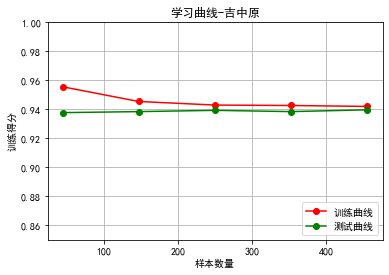

In [36]:

#定义一个学习曲线函数
def plot_learning_curve(est, title, X, y, ylim=None, cv=None, n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.rcParams['font.family'] = 'SimHei'  # 替换为你选择的字体
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    #设置横纵标签
    plt.xlabel("样本数量")
    plt.ylabel("训练得分")
    train_sizes, train_scores, test_scores = learning_curve(
        est, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    plt.grid()
    plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label = "训练曲线")
    plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label = "测试曲线")
    plt.legend(loc="lower right")
    #plt.legend(["Train", "Test"])
    return plt
    
title = "学习曲线-吉中原"
#设定拆分数量
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
est = GaussianNB()

plot_learning_curve(est, title, X, y, ylim=(0.85, 1.0), cv=cv, n_jobs=4)
plt.show()

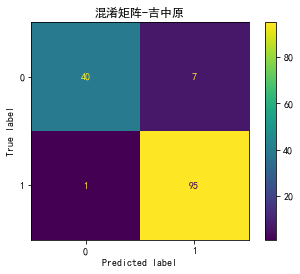

In [37]:
plot_confusion_matrix(gnb, X_test, y_test)  
plt.rcParams['font.family'] = 'SimHei'  # 替换为你选择的字体
plt.title("混淆矩阵-吉中原")
plt.show()

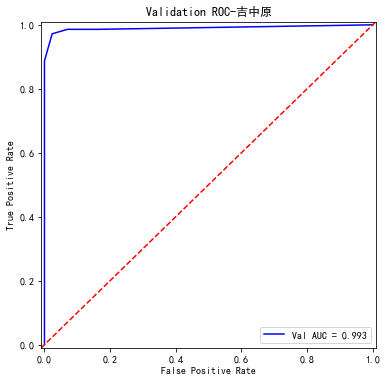

In [38]:
#指明字体参数，实现中文标签
plt.rcParams['font.family'] = 'SimHei'  # 替换为你选择的字体
plt.figure("乳腺癌数据绘制ROC", figsize=(6, 6))
#高斯朴素贝叶斯
pred_525 = gnb.predict_proba(X_test)[:, 1]
fpr_525, tpr_525, threshold = metrics.roc_curve(y_test, pred_525)
roc_auc_525 = metrics.auc(fpr_525, tpr_525)
plt.plot(fpr, tpr, 'b', label='Val AUC = %0.3f' % roc_auc_525)
plt.title('Validation ROC-吉中原')
plt.legend(loc='lower right')
plt.plot([-0.01, 1.01], [-0.01, 1.01], 'r--')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## 3. 将数据进行PCA特征提取——降维处理

通过对数据集原来的特征进行转换，生成新的“特征”或者说成分，会比直接使用原始的特征效果更好，即“数据表达”。 在数据集极为复杂的情况下，比如图像识别，数据表达就显得十分重要。

**PCA主成分分析法：可将多维数据降至低维数据**

In [39]:
#保留90%的相关性
pca = PCA(n_components=0.999999, random_state=62).fit(X_train);

X_pca = pca.transform(X)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print("数据集降维情况：")
print("==========")
print("训练集：{}".format(X_train_pca.shape))
print("测试集：{}".format(X_test_pca.shape))
print("==========")

feature = pd.DataFrame(data = X_pca)
feature

数据集降维情况：
训练集：(426, 8)
测试集：(143, 8)


,0,1,2,3,4,5,6,7
0,1138.568344,-299.072453,48.638973,-13.820915,29.634561,1.368958,1.158188,0.102658
1,1248.734448,8.868090,-39.902974,17.824617,-1.486398,-0.342352,-0.088659,0.219315
2,975.606406,34.098586,-5.764007,3.883728,0.246016,-2.727051,-0.918142,-0.267506
3,-427.810136,-65.844510,9.915123,-12.593789,5.040486,1.393068,-1.131373,-0.115173
4,910.850832,184.598341,-4.603185,6.688684,9.189668,0.910955,-0.318222,0.288255
5,-232.305868,-79.377185,-0.620864,-4.012302,6.915743,0.767684,1.300606,-0.406431
6,800.546544,-51.821589,-34.642362,-0.538536,2.939448,1.443450,-0.329624,-0.405352
7,-45.746137,-74.356771,12.088238,-7.413262,1.687435,-1.556474,0.135882,0.189412
8,-211.851129,-41.782778,-5.968271,-10.623748,-0.104999,-0.337988,0.476165,-0.357284
9,-258.950053,-64.767580,-2.827975,-10.883963,-10.918972,-2.262611,4.736139,0.205970


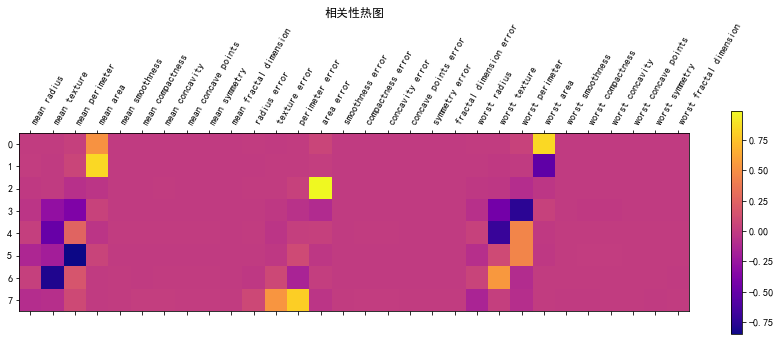

In [40]:
#热度图可视化原始特征于PCA主成分之间的关系
plt.matshow(pca.components_, cmap='plasma')
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)), cancer.feature_names, rotation=60, ha='left')

matplotlib.rcParams['axes.unicode_minus'] =False
plt.rcParams['font.family'] = 'SimHei'  # 替换为你选择的字体
plt.title("相关性热图")
plt.show()

In [41]:
gnb_pca = GaussianNB().fit(X_train_pca, y_train)

print("进行数据降维处理后的结果：")
print("==========")
print("训练集得分：{:.4f}".format(gnb_pca.score(X_train_pca, y_train)))
print("测试集得分：{:.4f}".format(gnb_pca.score(X_test_pca, y_test)))
print("==========")

进行数据降维处理后的结果：
训练集得分：0.9108
测试集得分：0.9161


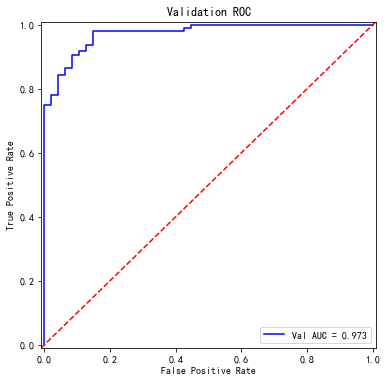

In [42]:
pred2 = gnb_pca.predict_proba(X_test_pca)[:, 1]
# 画图部分
fpr2, tpr2, threshold2 = metrics.roc_curve(y_test, pred2)
roc_auc2 = metrics.auc(fpr2, tpr2)
plt.figure("乳腺癌数据绘制ROC-吉中原", figsize=(6, 6))
plt.title('Validation ROC')
plt.plot(fpr2, tpr2, 'b', label='Val AUC = %0.3f' % roc_auc2)
plt.legend(loc='lower right')
plt.plot([-0.01, 1.01], [-0.01, 1.01], 'r--')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

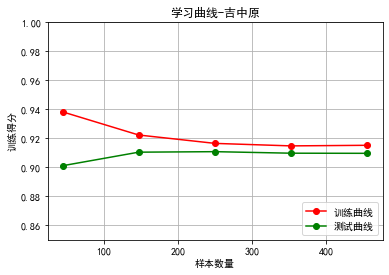

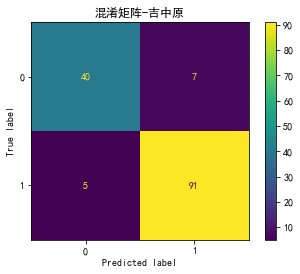

In [43]:
plot_learning_curve(est, title, X_pca, y, ylim=(0.85, 1.0), cv=cv, n_jobs=4)
plot_confusion_matrix(gnb_pca, X_test_pca, y_test) 
plt.title("混淆矩阵-吉中原")
plt.show()

# 4. 进行MinMaxScaler预处理查看拟合情况

**MaxMinScaler的原理：把所有数据压缩到0~1之间，这样会使模型训练速度更快并且准确性更高。**

In [44]:
#进行预处理，并查看处理后数据情况
scaler = MinMaxScaler().fit(X_train)

X_pp= scaler.transform(X)
X_train_pp = scaler.transform(X_train)
X_test_pp = scaler.transform(X_test)

feature = pd.DataFrame(data = X_pp, columns = cancer.feature_names)

feature

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.504383,0.000000,0.532650,0.356389,0.593753,0.792037,0.703140,0.731113,0.736186,0.605518,...,0.610409,0.130067,0.661431,0.445464,0.572692,0.698643,0.568610,0.912027,0.598462,0.541370
1,0.630736,0.255709,0.604496,0.495838,0.289880,0.181768,0.203608,0.348757,0.407367,0.141323,...,0.596155,0.307378,0.530273,0.429833,0.301026,0.168530,0.192971,0.639175,0.233590,0.288064
2,0.587639,0.376125,0.583867,0.443062,0.514309,0.431017,0.462512,0.635686,0.546587,0.211247,...,0.544258,0.369204,0.498246,0.368549,0.446763,0.431816,0.359744,0.835052,0.403706,0.275856
3,0.182624,0.346021,0.210983,0.092551,0.811321,0.811361,0.565604,0.522863,0.832611,1.000000,...,0.227761,0.397492,0.225611,0.085376,0.909445,0.920760,0.548642,0.884880,1.000000,1.000000
4,0.617023,0.137024,0.620145,0.483395,0.430351,0.347893,0.463918,0.518390,0.405742,0.186816,...,0.506615,0.110819,0.496721,0.335302,0.397241,0.188893,0.319489,0.558419,0.157500,0.184300
5,0.233067,0.184083,0.246479,0.131597,0.678613,0.461996,0.369728,0.402038,0.556338,0.551179,...,0.248227,0.317294,0.248640,0.128523,0.692253,0.542929,0.427716,0.598282,0.477035,0.587996
6,0.517116,0.332180,0.509888,0.373123,0.379164,0.274891,0.264058,0.367793,0.397616,0.157119,...,0.519041,0.431321,0.501805,0.342993,0.445348,0.247106,0.302236,0.663918,0.295289,0.242794
7,0.294774,0.361592,0.300754,0.174848,0.598267,0.445126,0.219447,0.297465,0.615385,0.517060,...,0.306337,0.445319,0.285242,0.167080,0.595331,0.369508,0.213898,0.534708,0.321506,0.509156
8,0.260003,0.395848,0.281548,0.149918,0.674099,0.533157,0.435567,0.464861,0.698808,0.504002,...,0.248958,0.520852,0.262874,0.127953,0.629996,0.559751,0.430511,0.707904,0.554504,0.442184
9,0.233557,0.472664,0.256438,0.131082,0.595558,0.675480,0.532568,0.424602,0.525460,0.683867,...,0.234340,0.811024,0.219409,0.121030,0.736116,1.132916,0.882588,0.759450,0.552139,1.292472


In [45]:
gnb_pp = GaussianNB().fit(X_train_pp, y_train)

print("MinMaxScaler预处理拟合的结果：")
print("==========")
print("训练集得分：{:.4f}".format(gnb_pp.score(X_train_pp, y_train)))
print("测试集得分：{:.4f}".format(gnb_pp.score(X_test_pp, y_test)))
print("==========")

MinMaxScaler预处理拟合的结果：
训练集得分：0.9460
测试集得分：0.9371


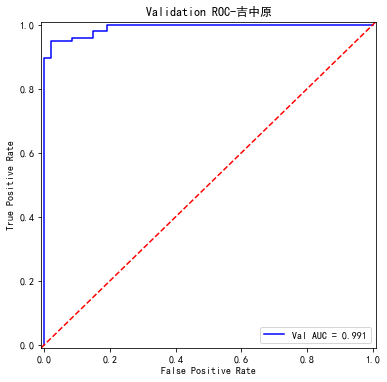

In [46]:
pred3 = gnb_pp.predict_proba(X_test_pp)[:, 1]
# 画图部分
fpr3, tpr3, threshold3 = metrics.roc_curve(y_test, pred3)
roc_auc3 = metrics.auc(fpr3, tpr3)
plt.figure("乳腺癌数据绘制ROC", figsize=(6, 6))
plt.title('Validation ROC-吉中原')
plt.plot(fpr3, tpr3, 'b', label='Val AUC = %0.3f' % roc_auc3)
plt.legend(loc='lower right')
plt.plot([-0.01, 1.01], [-0.01, 1.01], 'r--')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

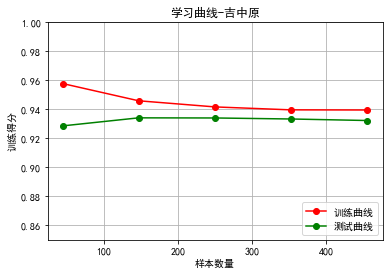

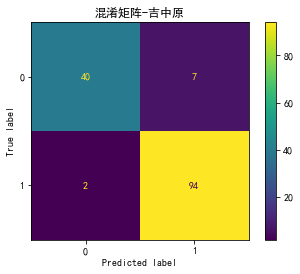

In [47]:
plot_learning_curve(est, title, X_pp, y, ylim=(0.85, 1.0), cv=cv, n_jobs=4)
plot_confusion_matrix(gnb_pp, X_test_pp, y_test)
plt.title("混淆矩阵-吉中原")
plt.show()

## 5. 效果分析总结

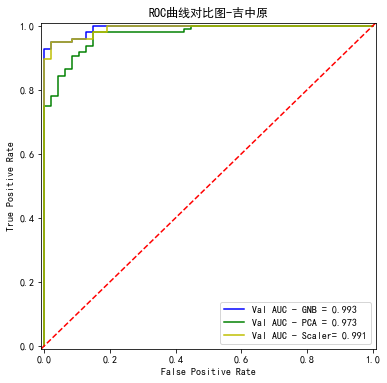

In [48]:
#ROC曲线对比图

plt.figure("乳腺癌数据绘制ROC", figsize=(6, 6))

plt.plot(fpr_525, tpr_525, 'b', label='Val AUC - GNB = %0.3f' % roc_auc_525)
plt.plot(fpr2, tpr2, 'g', label='Val AUC - PCA = %0.3f' % roc_auc2)
plt.plot(fpr3, tpr3, 'y', label='Val AUC - Scaler= %0.3f' % roc_auc3)

plt.title('ROC曲线对比图-吉中原')

plt.legend(loc='lower right')
plt.plot([-0.01, 1.01], [-0.01, 1.01], 'r--')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


根据测试的结果，可以看出不同数据处理方法对高斯朴素贝叶斯模型的性能产生了一定影响。以下是对每种处理方法的分析：

1. 高斯朴素贝叶斯直接拟合：
   - 训练集得分：0.9484
   - 测试集得分：0.9441
   - Val AUC： 0.993
   - 在未经过任何特征处理的情况下，模型在训练集和测试集上表现良好，具有较高的准确性。

2. 特征提取降维处理后的拟合结果：
   - 训练集得分：0.9108
   - 测试集得分：0.9161
   - Val AUC： 0.973
   - 在进行特征提取和降维处理后，模型的训练集和测试集得分略有下降，但仍然保持在较高水平，说明模型在处理过程中仍保持了较好的性能。

3. MinMaxScaler预处理的拟合结果：
   - 训练集得分：0.9460
   - 测试集得分：0.9371
   - Val AUC： 0.991
   - 使用MinMaxScaler进行预处理后，模型的训练集和测试集得分略低于直接拟合的结果，但基本与直接拟合的结果持平。

综合来看，使用高斯朴素贝叶斯对该数据集有较好的拟合效果，说明该数据具有较强的正态性，而进行MinMaxScaler预处理对数据集的拟合效果影响并不是很大，反而特征提取降维处理会使拟合效果略微降低，影响模型得分。


In [49]:
print(classification_report(y_test,gnb.predict(X_test),target_names=["恶性","良性"]))

              precision    recall  f1-score   support

          恶性       0.98      0.85      0.91        47
          良性       0.93      0.99      0.96        96

    accuracy                           0.94       143
   macro avg       0.95      0.92      0.93       143
weighted avg       0.95      0.94      0.94       143



# 决策树

何润涛

In [50]:
import warnings
warnings.filterwarnings('ignore')

#导入数据集以及各种库和模块
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import make_classification
#导入绘制混淆矩阵工具
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
#导入计算平均绝对误差和均方根误差函数
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
#数据集拆分
from sklearn.model_selection import train_test_split
#导入随机拆分工具
from sklearn.model_selection import ShuffleSplit
#导入学习曲线库
from sklearn.model_selection import learning_curve
#导入决策树部分
from sklearn import tree
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeRegressor
#绘制ROC曲线所需库
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# 划分数据集为训练集和测试集
X, y = cancer.data, cancer.target
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=42)

# 打印拆分结果
print("数据集拆分情况：")
print("==========")
print("训练集：{}".format(X_train.shape))
print("测试集：{}".format(X_test.shape))
print("==========")

数据集拆分情况：
训练集：(455, 30)
测试集：(114, 30)


In [51]:
# 创建决策树回归模型
clf = DecisionTreeRegressor(max_depth=4)

# 训练模型
tre = clf.fit(X_train, y_train)

# 预测
y_pred = clf.predict(X_test)

# 计算平均绝对误差和均方根误差
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)

Mean Absolute Error: 0.056628056628056624
Mean Squared Error: 0.05239358439927429


In [52]:
print("直接拟合的结果：")
print("==========")
print("训练集得分：{:.4f}".format(tre.score(X_train, y_train)))
print("测试集得分：{:.4f}".format(tre.score(X_test, y_test)))
print("==========")

直接拟合的结果：
训练集得分：0.9813
测试集得分：0.7770


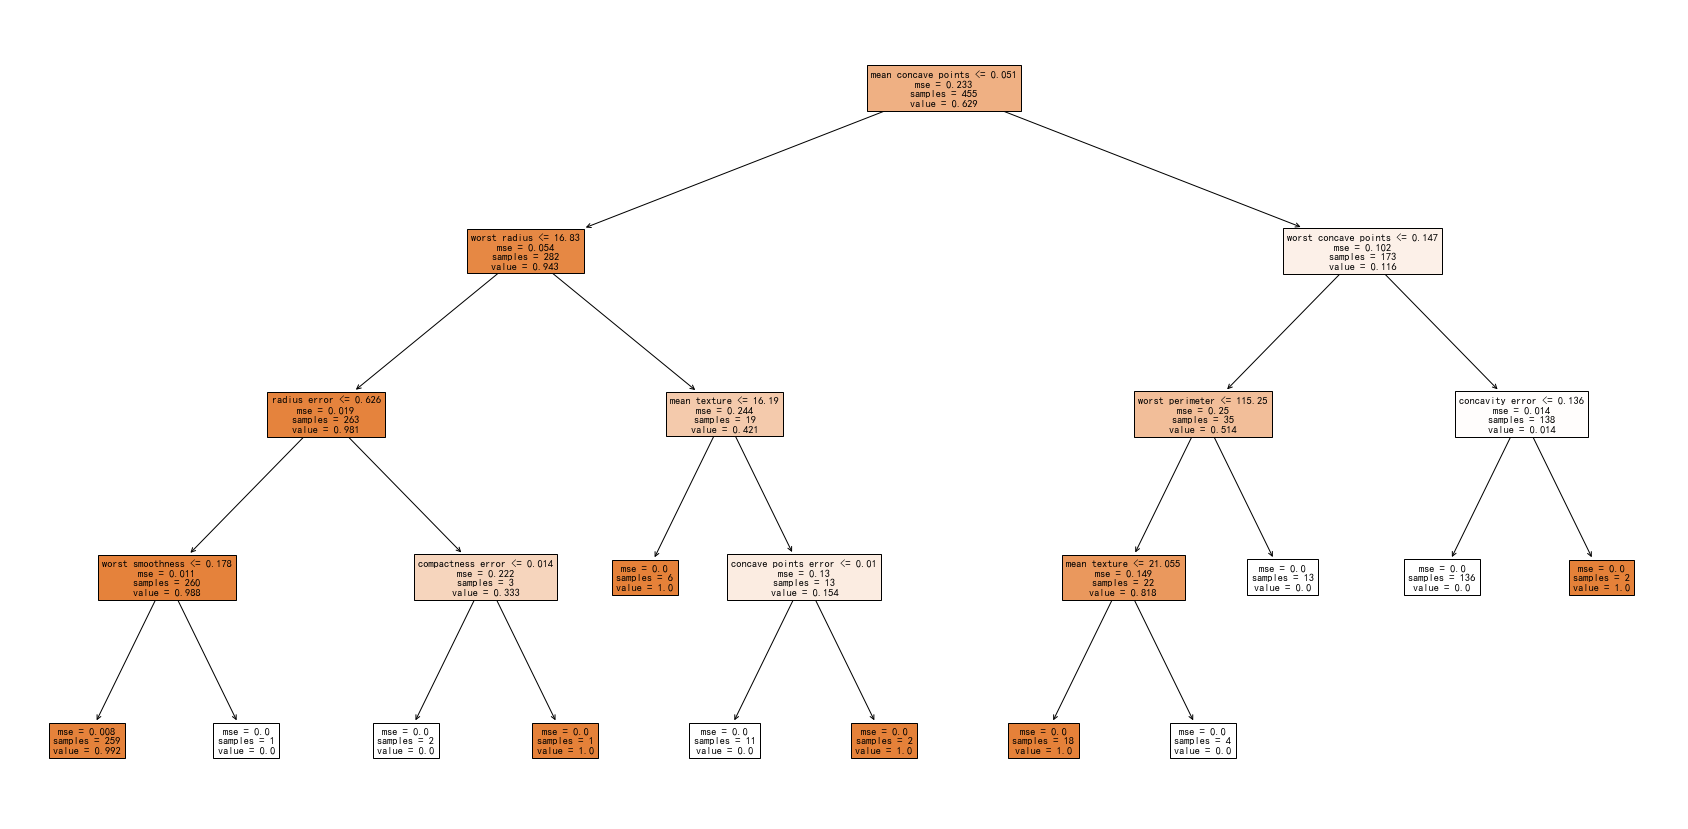

In [53]:
# 指定图幅大小
plt.figure(figsize=(30,15))

# 绘制图像
tree.plot_tree(clf,filled = True,feature_names=cancer.feature_names)
plt.show()

# 保存图像
#plt.savefig('./tree.jpg')

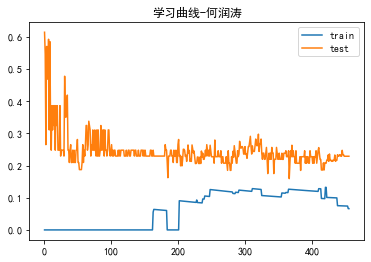

In [54]:
#基于RMSE绘制学习曲线
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
plt.rcParams['font.family'] = 'SimHei'

def plot_learning_curve(algo, X_train, X_test, y_train, y_test):
    train_scores = []
    test_scores = []
    for i in range(1, len(X_train)+1):
        algo.fit(X_train[:i], y_train[:i])

        y_train_predict = algo.predict(X_train[:i])
        train_scores.append(mean_squared_error(y_train[:i], y_train_predict))

        y_test_predict = algo.predict(X_test)
        test_scores.append(mean_squared_error(y_test, y_test_predict))

    plt.plot([i for i in range(1, len(X_train)+1)],
             np.sqrt(train_scores), label="train")
    plt.plot([i for i in range(1, len(X_train)+1)],
             np.sqrt(test_scores), label="test")
    plt.title("学习曲线-何润涛")
    plt.legend()
    plt.show()

plot_learning_curve(clf,X_train, X_test, y_train, y_test)

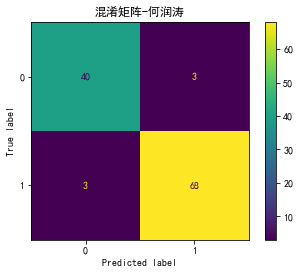

In [55]:
#绘制混淆矩阵
from sklearn.metrics import ConfusionMatrixDisplay

#返回值y_pred内有大量小数，将其整数化
yy_pred=list(y_pred)
for i in range(114):
    if y_pred[i]>0.9:
        yy_pred[i]=1

cm = confusion_matrix(y_test, yy_pred) 
cm_display = ConfusionMatrixDisplay(cm).plot()
plt.rcParams['font.family'] = 'SimHei'  # 替换为你选择的字体
plt.title("混淆矩阵-何润涛")
plt.show()

绘制ROC曲线

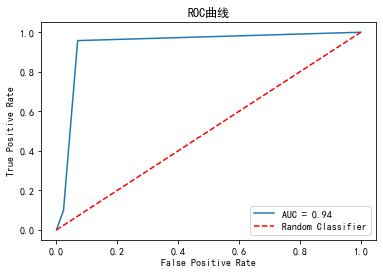

In [56]:
plt.rcParams['font.family'] = 'SimHei'
fpr522, tpr522, thresholds = roc_curve(y_test, y_pred)
roc_auc_522 = roc_auc_score(y_test, y_pred)
plt.plot(fpr522, tpr522, label=f'AUC = {roc_auc_522:.2f}')  # 绘制ROC曲线，标注AUC的值
# 随即分类器没有分类能力，其FPR=TPR。随机分类器的性能通常表示为ROC曲线上的对角线
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random Classifier')  # 绘制随机分类器的ROC曲线
plt.xlabel('False Positive Rate')  # x轴标签为FPR
plt.ylabel('True Positive Rate')   # y轴标签为TPR
plt.title('ROC曲线')             # 设置标题
plt.legend()                    
plt.show() 

In [57]:
y_pred = [1 if i >0 else 0 for i in y_pred]
print(classification_report(y_test,y_pred,target_names=["恶性","良性"]))

              precision    recall  f1-score   support

          恶性       0.93      0.93      0.93        43
          良性       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



# 随机森林

涂富同

## 对数据集划分

In [58]:
#划分数据集为训练集和测试集
X, y = cancer.data, cancer.target
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.3, random_state=42)

#打印拆分结果
print("数据集拆分情况：")
print("==========")
print("训练集：{}".format(X_train.shape))
print("测试集：{}".format(X_test.shape))
print("==========")

数据集拆分情况：
训练集：(398, 30)
测试集：(171, 30)


## 实现创建、训练模型等功能

In [59]:
#特征缩放
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#创建随机森林分类器
rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42) 
#训练模型
rf.fit(X_train, y_train)
#预测
y_pred = rf.predict(X_test)

#计算平均绝对误差和均方根误差
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)

Mean Absolute Error: 0.03508771929824561
Mean Squared Error: 0.03508771929824561


In [60]:
print("随机森林拟合的结果：")
print("==========")
print("训练集得分：{:.4f}".format(rf.score(X_train, y_train)))
print("测试集得分：{:.4f}".format(rf.score(X_test, y_test)))
print("==========")

随机森林拟合的结果：
训练集得分：0.9925
测试集得分：0.9649


0.9925说明了模型几乎完美地学会了训练数据中的模式。
0.9649说明了模型具有较好的泛化能力，不仅能在已知数据上表现良好，也将能较为准确地预测新数据

## 实现各个特征对于模型预测的重要性排序的功能

In [61]:
#完成随机森林模型的训练后
rf = RandomForestClassifier()  #rf是训练好的实例
rf.fit(X_train, y_train)
feature_importances = rf.feature_importances_

#获取特征名称
features = cancer.feature_names  
# 将特征重要性与特征名称配对
importance_series = pd.Series(feature_importances, index=features)

#打印
print(importance_series.sort_values(ascending=False))

worst concave points       0.168016
worst area                 0.116453
worst radius               0.097622
worst perimeter            0.092957
mean concave points        0.082647
mean concavity             0.069542
mean radius                0.053075
mean perimeter             0.052063
area error                 0.038043
mean area                  0.036660
worst concavity            0.034272
worst symmetry             0.018908
worst texture              0.015268
worst compactness          0.013946
mean texture               0.013835
worst smoothness           0.011996
perimeter error            0.011074
radius error               0.010108
mean compactness           0.008660
concavity error            0.007704
symmetry error             0.006585
worst fractal dimension    0.005792
mean smoothness            0.005728
fractal dimension error    0.005195
compactness error          0.005096
smoothness error           0.005096
concave points error       0.003816
texture error              0

## 模型的学习曲线

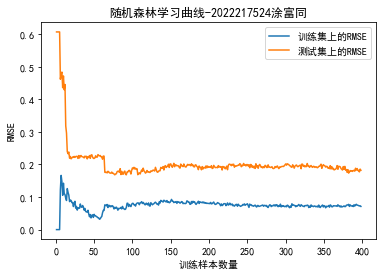

In [62]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
def plot_learning_curve(algo, X_train, X_test, y_train, y_test):
    #初始化两个列表，分别用来存储训练集和测试集上的RMSE分数
    train_scores = []
    test_scores = []
    
    #遍历训练集
    for i in range(1, len(X_train)+1):
        #进行拟合
        algo.fit(X_train[:i], y_train[:i])
        
        #对训练集进行预测，并计算RMSE
        y_train_predict = algo.predict(X_train[:i])
        train_rmse = np.sqrt(mean_squared_error(y_train[:i], y_train_predict))
        #将训练集的RMSE添加到列表中
        train_scores.append(train_rmse)
        #对测试集进行预测，并计算RMSE
        y_test_predict = algo.predict(X_test)
        test_rmse = np.sqrt(mean_squared_error(y_test, y_test_predict))
        #将测试集的RMSE添加到列表中
        test_scores.append(test_rmse)

    #绘制学习曲线
    #x轴是训练样本的数量，y轴是RMSE
    plt.plot(range(1, len(X_train)+1), train_scores, label="训练集上的RMSE")  #训练集曲线
    plt.plot(range(1, len(X_train)+1), test_scores, label="测试集上的RMSE")   #测试集曲线
    
    #设置图表标题和坐标轴标签
    plt.title("随机森林学习曲线-2022217524涂富同")  #图表标题
    plt.xlabel("训练样本数量")  #x轴标签
    plt.ylabel("RMSE")  #y轴标签
    
    #添加图例来区分训练集和测试集的曲线
    plt.legend()
    
    #输出图标
    plt.show()

#传入模型及数据
plot_learning_curve(RandomForestRegressor(), X_train, X_test, y_train, y_test)#生成图表耗时较长

## 模型的混淆矩阵

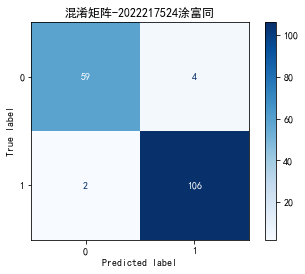

In [63]:
#定义函数
def plot_confusion_matrix(y_test, y_pred, title_suffix=""):
    #计算混淆矩阵
    cm = confusion_matrix(y_test, y_pred)
    #蓝色好看
    cm_display = ConfusionMatrixDisplay(cm).plot(cmap='Blues')
    plt.rcParams['font.family'] = 'SimHei'
    plt.title(f"混淆矩阵-2022217524涂富同{title_suffix}")
    #输出图表
    plt.show()
y_pred= rf.predict(X_test)
    
#绘制混淆矩阵
plot_confusion_matrix(y_test, y_pred)

## 模型的ROC曲线

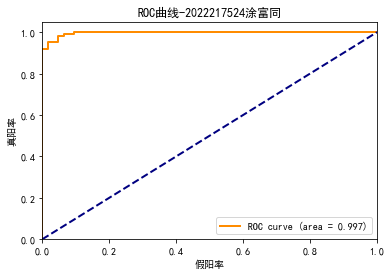

In [64]:
#计算ROC曲线和AUC
predict_probs = rf.predict_proba(X_test)
y_score = predict_probs[:,1]
fpr524, tpr524, _ =metrics.roc_curve(y_test, y_score) #fpr为假阳率，tpr为真阳率
roc_auc_524 = auc(fpr524, tpr524) #计算AUC
plt.figure()  #创建新的图表
plt.plot(fpr524, tpr524, color='darkorange', lw=2, label='ROC curve (area = %0.3f)' % roc_auc_524 )  # 绘制ROC曲线
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  #绘制对角线
plt.xlim([0.0, 1.0])  #设置x轴的范围
plt.ylim([0.0, 1.05]) #设置y轴的范围，略大于1以完整显示曲线
plt.xlabel('假阳率')   #x轴标签
plt.ylabel('真阳率')   #y轴标签
plt.title('ROC曲线-2022217524涂富同')  
plt.legend(loc="lower right") 
#输出
plt.show()  

In [65]:
print(classification_report(y_test,rf.predict(X_test),target_names=["恶性","良性"]))

              precision    recall  f1-score   support

          恶性       0.97      0.94      0.95        63
          良性       0.96      0.98      0.97       108

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



# 随机森林

熊志威

In [66]:
X, y = cancer.data, cancer.target
# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 创建随机森林分类器模型
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# 训练模型
rf_model.fit(X_train, y_train)

# 预测测试集
y_pred = rf_model.predict(X_test)

# 计算准确率
accuracy = accuracy_score(y_test, y_pred)
print("模型准确率:", accuracy)

模型准确率: 0.9649122807017544


0.96491说明了模型几乎完美地学会了训练数据中的模式。

## 实现各个特征对于模型预测的重要性排序的功能

In [67]:
# 获取特征重要性
feature_importance = rf_model.feature_importances_

# 特征重要性排序
indices = np.argsort(feature_importance)[::-1]

# 打印特征重要性排序结果
print("特征重要性排序:")
for i, feature_index in enumerate(indices):
    print(f"{i + 1}. {cancer.feature_names[feature_index]}: {feature_importance[feature_index]}")

特征重要性排序:
1. worst area: 0.15389236463205394
2. worst concave points: 0.14466326620735528
3. mean concave points: 0.10620998844591638
4. worst radius: 0.07798687515738047
5. mean concavity: 0.06800084191430111
6. worst perimeter: 0.06711483267839194
7. mean perimeter: 0.053269746128179675
8. mean radius: 0.048703371737755234
9. mean area: 0.04755500886018552
10. worst concavity: 0.031801595740040434
11. area error: 0.022406960160458473
12. worst texture: 0.021749011006763207
13. worst compactness: 0.020266035899623565
14. radius error: 0.02013891719419153
15. mean compactness: 0.013944325074050485
16. mean texture: 0.013590877656998469
17. perimeter error: 0.01130301388178435
18. worst smoothness: 0.010644205147280952
19. worst symmetry: 0.010120176131974357
20. concavity error: 0.009385832251596627
21. mean smoothness: 0.007285327830663239
22. fractal dimension error: 0.00532145634222884
23. compactness error: 0.005253215538990106
24. worst fractal dimension: 0.005210118545497296
25. t

## 模型的学习曲线

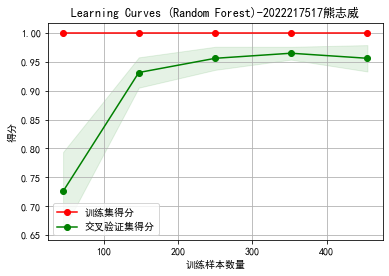

In [68]:
# 定义绘制学习曲线函数
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("训练样本数量")
    plt.ylabel("得分")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="训练集得分")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="交叉验证集得分")

    plt.legend(loc="best")
    return plt

# 绘制学习曲线
title = "Learning Curves (Random Forest)-2022217517熊志威"
plot_learning_curve(rf_model, title, X, y, cv=5)
plt.show()

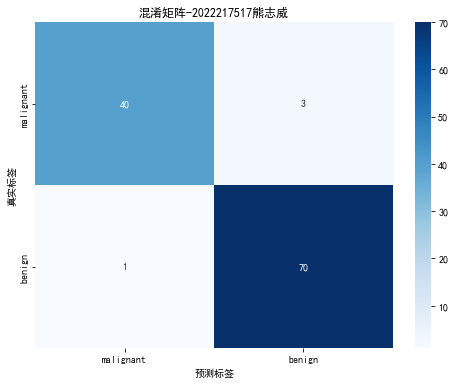

In [69]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# 计算混淆矩阵
conf_matrix = confusion_matrix(y_test, y_pred)

# 绘制热图
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', 
            xticklabels=cancer.target_names, yticklabels=cancer.target_names)
plt.xlabel('预测标签')
plt.ylabel('真实标签')
plt.title('混淆矩阵-2022217517熊志威')
plt.show()

## 模型的ROC曲线

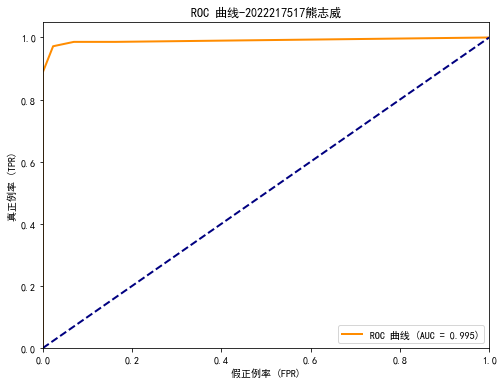

In [70]:
from sklearn.metrics import roc_curve, auc
# 计算模型的预测概率
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]
# 计算 ROC 曲线上的点
fpr517, tpr517, thresholds = roc_curve(y_test, y_pred_proba)
# 计算 AUC（曲线下的面积）
roc_auc_517 = auc(fpr517, tpr517)

# 绘制 ROC 曲线
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC 曲线 (AUC = %0.3f)' % roc_auc_517)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('假正例率 (FPR)')
plt.ylabel('真正例率 (TPR)')
plt.title('ROC 曲线-2022217517熊志威')
plt.legend(loc='lower right')
plt.show()

In [71]:
print(classification_report(y_test,rf_model.predict(X_test),target_names=["恶性","良性"]))

              precision    recall  f1-score   support

          恶性       0.98      0.93      0.95        43
          良性       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



# ROC曲线对比

<Figure size 432x288 with 0 Axes>

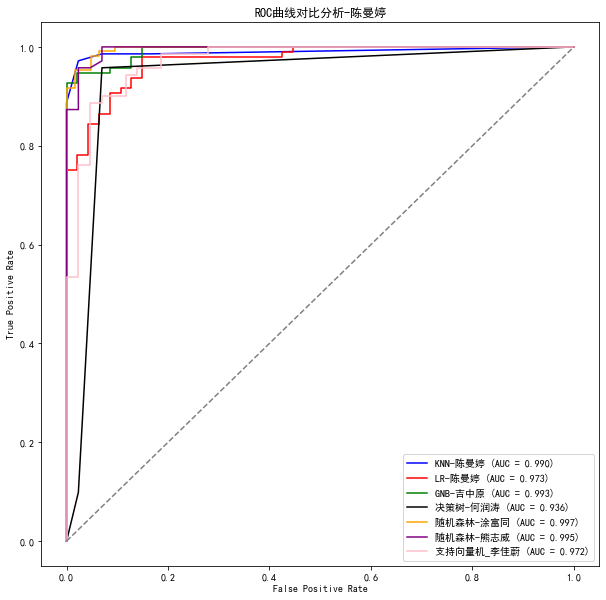

In [72]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
# 绘制ROC曲线
plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='b', label='KNN-陈曼婷 (AUC = %0.3f)' % roc_auc)
plt.plot(fpr2, tpr2, color='r', label='LR-陈曼婷 (AUC = %0.3f)' % roc_auc2)
plt.plot(fpr_525, tpr_525, 'g', label='GNB-吉中原 (AUC = %0.3f)' % roc_auc_525)
plt.plot(fpr522, tpr522, 'black', label='决策树-何润涛 (AUC = %0.3f)' % roc_auc_522)
plt.plot(fpr524, tpr524, 'orange', label='随机森林-涂富同 (AUC = %0.3f)' % roc_auc_524)
plt.plot(fpr517, tpr517, 'purple', label='随机森林-熊志威 (AUC = %0.3f)' % roc_auc_517)
plt.plot(fpr507, tpr507, color='pink', label='支持向量机_李佳蔚 (AUC = %0.3f)' % roc_auc_507)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC曲线对比分析-陈曼婷')
plt.legend(loc="lower right")
plt.show()

# 部分模型降维展示

在机器学习和深度学习领域，特征往往是高维度的，必须对特征进行降维之后才能可视化。该函数可以对模型进行可视化。

In [73]:
from sklearn.decomposition import PCA
def pca(x,y,model,name1,name2): 
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(x)
    X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)
    model.fit(X_train, y_train)
    x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
    y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.Paired)
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap=plt.cm.Paired)
    plt.title('{}模型降维展示-{}'.format(name1,name2))
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.colorbar()
    plt.show()

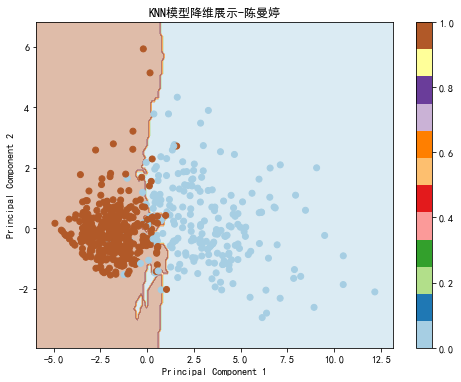

In [74]:
pca(selected_features,y,model,"KNN","陈曼婷")

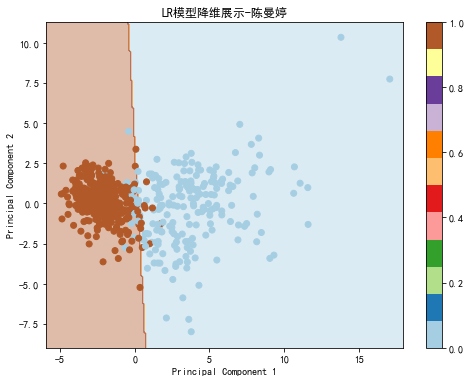

In [75]:
pca(selected_features2,y,model2,"LR","陈曼婷")